<a href="https://colab.research.google.com/github/mshafi710/kttsdataenrichment/blob/main/Text_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install python-docx
# import docx
!pip install docx2txt
import docx2txt
from google.colab import drive
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
import logging
drive.mount('/content/drive')
!pip install arabic_reshaper
!pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=6c16b796d0694e745b85007036b6e975eddeb379cf59259c6a088ab0862721b3
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
WORKING_DIR= '''/content/drive/MyDrive/PhD/Dataset/Text/text_files/'''
!ls $WORKING_DIR

'corpus 1.gdoc'   Corpus299.docx   Corpus312.docx   Corpus325.docx
'corpus 1.txt'	  Corpus300.docx   Corpus313.docx  'Edited Corpus.docx'
 Corpus288.docx   Corpus301.docx   Corpus314.docx   output.txt
 Corpus289.docx   Corpus302.docx   Corpus315.docx  'richness (1).csv'
 Corpus290.docx   Corpus303.docx   Corpus316.docx   richness.csv
 Corpus291.docx   Corpus304.docx   Corpus317.docx   richness.gsheet
 Corpus292.docx   Corpus305.docx   Corpus318.docx   translated_files
 Corpus293.docx   Corpus306.docx   Corpus319.docx   translated_files.tar.gz
 Corpus294.docx   Corpus307.docx   Corpus320.docx  'vocab (1).csv'
 Corpus295.docx   Corpus308.docx   Corpus321.docx   vocab.csv
 Corpus296.docx   Corpus309.docx   Corpus322.docx   vocab.gsheet
 Corpus297.docx   Corpus310.docx   Corpus323.docx
 Corpus298.docx   Corpus311.docx   Corpus324.docx


In [3]:
def get_vocab(text):
  '''
  return the vocabulary list (unique words in the given text)
  '''
  words= text.split(" ")
  print("------------------")
  print("Total Length(In Words): %d"  % len(words))
  words.sort()
  # get the unique list using set operation
  vocab=list(set(words))
  print("Vocab Size: %d" %len(vocab))
  return vocab

In [ ]:
def vocab_to_file(vocab):
  ''' writes vocab to the file with name in the VOCAB_FILE_NAME in the working directory  set by the variable  WORKING_DIR'''

  os.chdir(WORKING_DIR)
  with open ( WORKING_DIR+ VOCAB_FILE_NAME,'w') as out:
      for word in vocab:
        out.write(word+"\n")
  print('writing done')

In [ ]:
def richness(sentence):
    # basic richnes is equal to  as number of unique words of a sentence 
    tokens= sentence.split(" ")
    return  len(set(tokens))

In [ ]:
def refine_corpus_to_file(text,filename):
  sentences = text.split("۔")
  print(" total sentences: %d" % len(sentences))

  os.chdir(WORKING_DIR)  
  with open(WORKING_DIR + filename  ,'w') as out:
    for  sentence in sentences:
      if len(sentence) >0:        
        basic_richness= richness(sentence)
        out.write(sentence +"," + str (basic_richness)+ "\n")
        print(str(basic_richness))

In [ ]:
import pathlib
dir_path = WORKING_DIR
text=""
# TO DO
# If a word/senetence contains characters not in the list of kashmiri keyboard characters, reject that for simplicity purposes 
# Also delete the outliers from the dataset
text = text + docx2txt.process(dir_path+ "Edited Corpus.docx")


In [ ]:
text

'یوت تام میانہِ یادداشتُک تعلق چھُ ۱۹۹٠ء پٮ۪ٹھہٕ ۲٠٠٠ء تام اوس کُستام ؤری زِ مےٚ ہیوٚت مایٔسمہِ (سرینگر) ٲکس دوکاندارس گلوبند یُس مےٚ دوکاندارن دروٚگ دیُت۔ ٲتھۍ مسلس منٛز گو مےٚ تٔہندِس نیچوس سۭتۍ ملاقات ییٚمۍ یہِ ؤنِتھ بہٕ حٲران کوٚرُس زِ “دوکاندار چھُ مےٚ مول تہٕ سُہ چھُ جہنمی“۔ یہ واقعہ سنیوو مےٚ روحس تہٕ مےٚ تھوٚو یہ عبرتہٕ مۄکھہٕ پانس نِشہِ لیکھتِھ۔ اتھ نہ بنے نہِ کتھ، نہ افسانہٕ تہٕ نہ ڈراما تکیازِ بہٕ چھُس افسانہٕ نگٲری یا ڈراما نگٲری ہٕندٮ۪و گۄنو نِشہِ چھٔلِتھ تہٕ چھوٚکِتھ۔ بہر وۄنۍ ییٚلہ مےٚ یِم افسانہٕ ترتیب دِتۍ، اتھ افسانس دِژٕم اگست ۲٠۱۴ء منز افسانچ شکل۔ امیُک ضمنی واقعہ چھُ بالکل پوٚز۔\n\n\n\nپتہٕ اوس خالہ صٲب دٔر گُنڑ گامہٕ پٮ۪ٹھہٕ ژٔلتھ شہر سیٚدیٛامُت تہٕ ذال ڈگرٕ ٲکس مسجدِ ہُند بٲنگۍ بنیومُت۔ کنُے آسنہٕ مۄکھہٕ ٲسکھ ٲمِس مسجدٕے حوالہٕ کٔرمٕژ۔ مےٚ بوٗز پےتہٕ اکہِ دۄہہٕ گوس بہٕ خالہٕ صٲبس توٚتھے ملاقاتس۔ ٲمۍ ٲسۍ اکھ زٕ ریڑٕ تھٲوۍمٕتۍ۔ لکُھ ٲسِس ریڑٕ کِرایس پٮ۪ٹھ نِوان تہٕ کرایہِ ادا کران۔خالہٕ صٲبس اوس وۄنۍ پونسہٕ ٹوُنک سمیٛامُت۔ مےٚ دوٚپُس “ وۄنۍ گو کجس گژُھن“۔ خالہٕ ص

In [ ]:
VOCAB_FILE_NAME="vocab.csv"
vocab= get_vocab(text)
vocab_to_file(vocab)

------------------
Total Length(In Words): 73988
Vocab Size: 22743
writing done


In [ ]:
RICHNESS_FILE_NAME="richness.csv"
refine_corpus_to_file(text, RICHNESS_FILE_NAME )

In [ ]:

df=pd.read_csv(RICHNESS_FILE_NAME)
df.columns=  ['sentence','richness']
df=df.sort_values(by=['richness'], ascending=False)
df.reset_index(drop=True, inplace=True)
df=df.dropna(subset=['richness'])
df=df.assign(Deleted=False)

In [ ]:
# calculate the richness of the text by iterating over the sentence
wishlist=set(vocab)
for index, row in df.iterrows():
    tokens= row['sentence'].split(" ")
    # richness of a given sentence is the number of unique tokens matching with the remaining vocab
    match_words = set(tokens) & wishlist 
    if len(match_words)>0:
      row['richness']=len(match_words)      
      print(match_words)
      wishlist = wishlist - set(match_words)
    else:
      row['Deleted']=True
    print("Wishlist size remaining: %d " %len(wishlist) )
    print("DF size remaining: %d " %len(df) )
    print( "\n   ------------------- ")


Streaming output truncated to the last 5000 lines.
Wishlist size remaining: 4049 
DF size remaining: 5012 

   ------------------- 
{'پُرتغزل', 'بزٲتی'}
Wishlist size remaining: 4047 
DF size remaining: 5012 

   ------------------- 
{'منٛدٕ', 'تھِی'}
Wishlist size remaining: 4045 
DF size remaining: 5012 

   ------------------- 
{'گنڑن'}
Wishlist size remaining: 4044 
DF size remaining: 5012 

   ------------------- 
{'سَٹٔلایٹ'}
Wishlist size remaining: 4043 
DF size remaining: 5012 

   ------------------- 
{'(از'}
Wishlist size remaining: 4042 
DF size remaining: 5012 

   ------------------- 
{'پہَر', 'ہمیتار'}
Wishlist size remaining: 4040 
DF size remaining: 5012 

   ------------------- 
{'ہندوستانَس'}
Wishlist size remaining: 4039 
DF size remaining: 5012 

   ------------------- 
Wishlist size remaining: 4039 
DF size remaining: 5012 

   ------------------- 
Wishlist size remaining: 4039 
DF size remaining: 5012 

   ------------------- 
Wishlist size remaining: 4039 
DF si

In [ ]:
df

,sentence,richness,Deleted
0,“کہؤٹ“ پٔرتھ چھُ باسان زِ رٲہی صٲب چھُ عالمی...,110.0,False
1,بُلبُل چھُم چھٔنٛدۍ کٔرۍ کٔرۍ یاون راے نہار س...,90.0,False
2,اگر چہِ پننہِ شٲعری ہٕندۍ وساطتہٕ امیٖن کاملن ...,89.0,False
3,تَمہِ تَلہٕ چُھ رُتُے ظۄن نَظرِ یوان,87.0,False
4,ناول نگارس چھُ ناول پیش کٔرتھ اصل یہِ مقصد ہا...,85.0,False
...,...,...,...
5007,ونٛدٕ ژوٚل,2.0,False
5008,ٹِنۍٹِنۍ,1.0,False
5009,ٹِنۍ,1.0,False
5010,ٹاں,1.0,False


In [ ]:
# def plot_word_frequency(word_freq,counts):

#       fig,ax=plt.subplots(figsize=(12,8))
#       prop=FontProperties(fname="/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf")
#       x=list(range(15))
#       xticks=counts.most_common(15)
#       print(type(xticks))
#       xticks2=[get_display(arabic_reshaper.reshape(str(tick))) for tick in xticks]

#       plt.xticks(x,xticks2,fontproperties=prop,fontsize=18)
#       word_freq.sort_values(by='count').plot.bar(x='words',
#                       y='count',
#                       ax=ax,
#                       color="green")
#       ax.set_title("Common Words Found")

#       plt.show()

#       prop=FontProperties(fname="/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf")
#       cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(counts)
#       plt.figure(figsize=(16,12))
#       plt.imshow(cloud, interpolation='bilinear')
#       plt.axis('off')
#       plt.show()


In [ ]:
# doc = docx.Document((dir_path+ "Edited Corpus.docx")
# print("Total Paragraphs:" + str(len(doc.paragraphs)))
#   for para in doc.paragraphs:
#     for sentence in para.text.split("۔"):
#       print (sentence)
#       print("Richness: "+ str(richness(sentence.strip())) )


In [ ]:
# import pathlib
# dir_path = "/content/drive/MyDrive/PhD/Dataset/Text/doc and text files/"
# text=""
# for path in os.listdir(dir_path):
#   # print("\n==================== Processing "+dir_path+ path)
#   if pathlib.Path(path).suffix == '.docx':
#     text = text + docx2txt.process(dir_path+path)

# text = text + docx2txt.process(dir_path+ "Edited Corpus.docx")

# summary(text)
# word_frequency(text,plot=True)


# for sentence in text.split("۔"):
#     print("Richness: "+ str(richness(sentence.strip())) )
  # doc = docx.Document(dir_path+path)
  # print("Total Paragraphs:" + str(len(doc.paragraphs)))
  # for para in doc.paragraphs:
  #   for sentence in para.text.split("۔"):
  #     print (sentence)
  #     print("Richness: "+ str(richness(sentence.strip())) )


In [ ]:
# !pip install fonttools
!pip install --upgrade arabic-reshaper[with-fonttools]
# !pip install --upgrade arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display


reshaper = arabic_reshaper.ArabicReshaper(
    arabic_reshaper.config_for_true_type_font(
        '/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf')
)
res = {
 'الذكاء': 8,
 'الاصطناعي': 9,
 'هو': 2,
 'سلوك': 1,
 'وخصائص': 1,
 'ہُنٛد': 1,
 'تتسم': 1
}

res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in res.items()}

df = pd.DataFrame(res2.items(), columns=['word', 'count'])

sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="word", data=df)

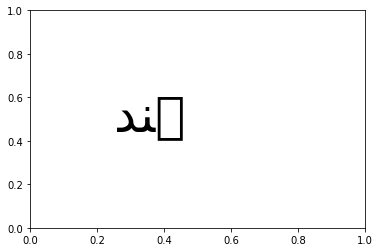

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape(u'ہُنٛد')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = '/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf',fontsize=50)
plt.show()

Text(0.5, 1.0, 'ﺪﻨﮨ ﺔﻴﺑﺮﻋ ﺔﻐﻟ')

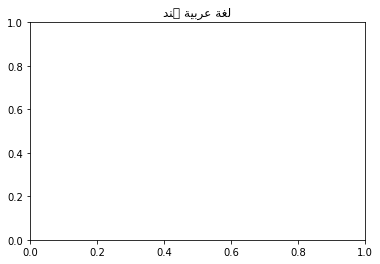

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة ہُنٛد')
bidi_text = get_display(reshaped_text)
plt.title(bidi_text)

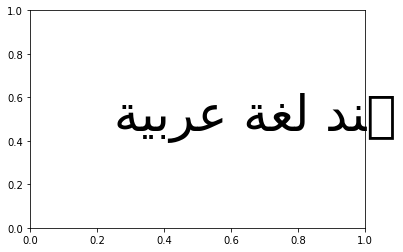

In [ ]:
import matplotlib.font_manager as font_manager

# Add every font at the specified location /content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf
font_dir = ['/content/drive/MyDrive/PhD/Dataset/Text/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
# rcParams['font.family'] = 'Afan_Koshur_Naksh'

from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape('ہُنٛد لغةٌ عربيّة')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = 'Afan_Koshur_Naksh',fontsize=50)
plt.show()

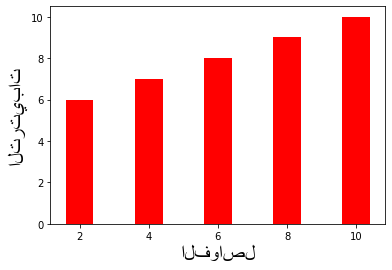

In [ ]:
import matplotlib
import matplotlib.font_manager as fm

# /content/drive/MyDrive/PhD/Dataset/Text/fonts/
# fm.fontManager.ttflist += fm.createFontList(['/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf'])
# fm.fontManager.addfont('/content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf')
# fm.list_fonts('/content/drive/MyDrive/PhD/Dataset/Text/fonts/','ttf')

path = '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/afan.ttf'
fontprop = fm.FontProperties(fname=path,size=20)
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 9, 10]

plt.bar(x, y, label='Bar1', color='red')
plt.xlabel(u"الفواصل", fontproperties=fontprop)
plt.ylabel(u"الترتيبات", fontproperties=fontprop)
plt.show()

# fm.findfont("afan.ttf")

In [ ]:
# !ls /content/drive/MyDrive/PhD/Dataset/Text/fonts
!ls /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
!cp /content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/


afan.ttf			DejaVuSerif.ttf
cmb10.ttf			LICENSE_DEJAVU
cmex10.ttf			LICENSE_STIX
cmmi10.ttf			STIXGeneralBolIta.ttf
cmr10.ttf			STIXGeneralBol.ttf
cmss10.ttf			STIXGeneralItalic.ttf
cmsy10.ttf			STIXGeneral.ttf
cmtt10.ttf			STIXNonUniBolIta.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBol.ttf
DejaVuSans-Bold.ttf		STIXNonUniIta.ttf
DejaVuSansDisplay.ttf		STIXNonUni.ttf
DejaVuSansMono-BoldOblique.ttf	STIXSizFiveSymReg.ttf
DejaVuSansMono-Bold.ttf		STIXSizFourSymBol.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymReg.ttf
DejaVuSansMono.ttf		STIXSizOneSymBol.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymReg.ttf
DejaVuSans.ttf			STIXSizThreeSymBol.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymReg.ttf
DejaVuSerif-Bold.ttf		STIXSizTwoSymBol.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymReg.ttf
DejaVuSerif-Italic.ttf


In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape('ہُنٛد لغةٌ عربيّة'.decode('utf8'))
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = 'Times New Roman',fontsize=50)
plt.show()

In [ ]:

# -*- coding: UTF-8 -*-

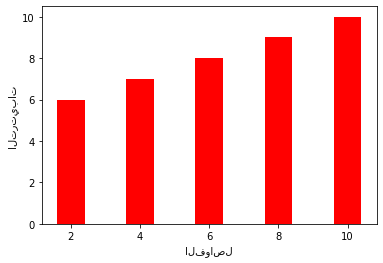

In [ ]:
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 9, 10]

plt.bar(x, y, label='Bar1', color='red')
plt.xlabel(u"الفواصل")
plt.ylabel(u"الترتيبات")
plt.show()


In [ ]:
# def word_frequency(text, plot=False):

#     unique_words= list(text.split(" "))
#     counts=Counter(unique_words)
#     print(len(counts))
#     print(counts.most_common(15))
#     word_freq = pd.DataFrame(counts.most_common(15),
#                              columns=['words', 'count'])
#     if plot is True:
#       plot_word_frequency(word_freq,counts)